In [145]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


class LogisticRegression:
    def __init__(self, learning_rate=0.01, bias=1, epochs=1000, lambda_=0.01):
        self.lr = learning_rate
        self.bias = bias
        self.epochs = epochs
        self.lambda_ = lambda_
        self.w = None
        
    def prob(self, X):
        if X.shape[1] != self.w.shape[0]:
            X = np.column_stack([np.ones(X.shape[0]), X])
        return sigmoid(X @ self.w)
    
    def loss(self, X, y):
        a = self.prob(X)
        loss_0 = -np.mean(y * np.log(a) + (1 - y) * np.log(1 - a))
        w_dc = 0.5 * self.lambda_ / X.shape[0] * np.sum(self.w ** 2)
        return loss_0 + w_dc
    
    def grad(self, X, y):
        a = self.prob(X)
        return X.T @ (a - y) + self.lambda_ * self.w
    
    def batch_generator(self, X, y, batch_size=32, shuffle=True):
        if shuffle:
            index = np.random.permutation(len(y))
            X, y = X[index], y[index]
        for i in range(0, X.shape[0], batch_size):
            yield X[i:i + batch_size], y[i:i + batch_size]
    
    def fit(self, X, y):
        if self.bias == 1:
            X = np.column_stack([np.ones(X.shape[0]), X])
            
        self.w = np.random.randn(X.shape[1])
        losses = []
        for epoch in range(self.epochs):
            for X_batch, y_batch in self.batch_generator(X, y, 64):
                grad = self.grad(X_batch, y_batch)
                self.w -= self.lr * grad
            losses.append(self.loss(X, y))
            
        return losses
    
    def predict(self, X):
        return (self.prob(X) > 0.5).astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


<Axes: >

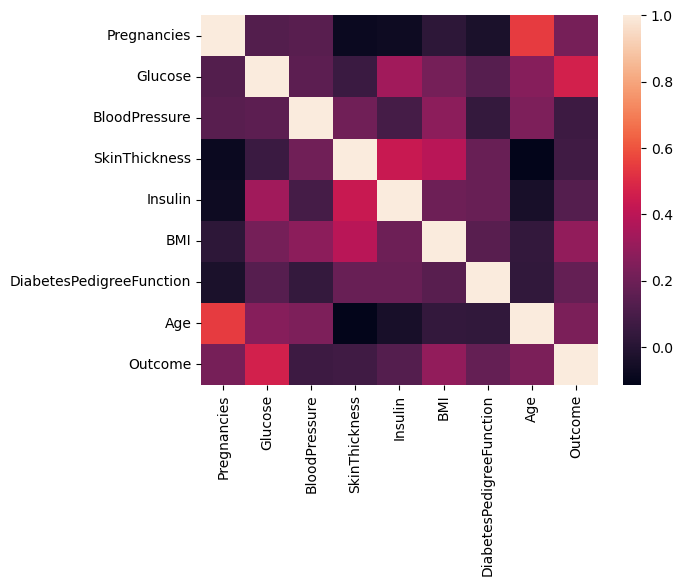

In [146]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("diabetes.csv")
print (df.info())

# outcome_0 = df[df['Outcome'] == 0]
# keep_samples = outcome_0.sample(n=300, random_state=42)
# outcome_1 = df[df['Outcome'] == 1]
# df = pd.concat([keep_samples, outcome_1])

corr = df.corr()
import seaborn as sns
sns.heatmap(corr)


In [147]:

X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

print(y.shape[0] - y.sum())

500


In [148]:
columns = X.columns
print(columns)

for column in columns:
    X.loc[X[column] == 0, column] = X[column].sum() / df.shape[0]
    

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [149]:
def my_train_test_split(X, y, test_size=0.2, random_state=None):
    X = np.array(X)
    y = np.array(y)
    
    if X.shape[0] != y.shape[0]:
        raise ValueError("X va Y khong cung chieu du lieu")
        
    n_samples = X.shape[0]
    
    n_train = int(n_samples - (n_samples * test_size))
    
    if random_state is not None:
        np.random.seed(random_state)
    
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    train_indices = indices[:n_train]
    test_indices = indices[n_train:]
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test

In [150]:
X_scaled = (X - X.min()) / (X.max() - X.min())
X_train, X_test, y_train, y_test = my_train_test_split(X_scaled, y, 0.2, 42)


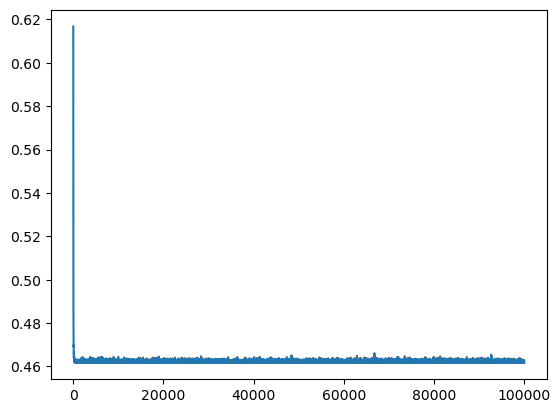

In [151]:
logistic = LogisticRegression(0.01, 1, 100000, 0.01)
losses = logistic.fit(X_train, y_train)

plt.plot(losses)


In [152]:
y_pred = logistic.predict(X_test)
# print(y_pred)
# print(y_test)
# accuracy = np.mean(y_pred == y_test)
# print(accuracy)

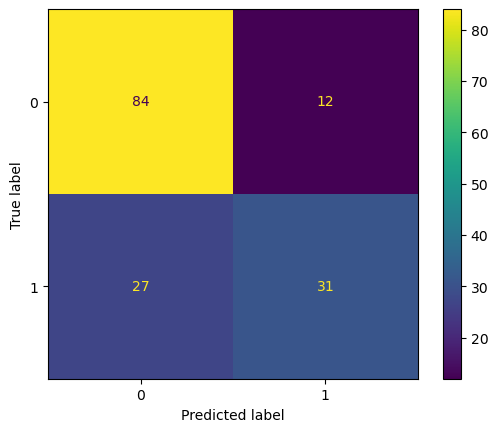

In [153]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# log_reg = LogisticRegression(random_state=42, max_iter=10000)
# log_reg.fit(X_train, y_train)

# # Predict and evaluate
# y_pred = log_reg.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

In [155]:
# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        96
           1       0.72      0.53      0.61        58

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



In [132]:
X_0 = X_train[(y_train == 0)]
X_1 = X_train[(y_train == 1)]

y_0 = y_train[(y_train == 0)]
y_1 = y_train[(y_train == 1)]


print(y_1.shape, y_0.shape)


(210,) (404,)


In [133]:
indices = np.arange(X_1.shape[0])
np.random.shuffle(indices)

new_X_1 = X_1[indices[:(X_0.shape[0] - X_1.shape[0])]]

X_1 = np.concatenate([X_1, new_X_1], axis=0)

print(X_1.shape)

new_y_1 = y_1[indices[:(y_0.shape[0] - y_1.shape[0])]]

print(new_y_1.shape, y_0.shape)

y_1 = np.concatenate((y_1, new_y_1), axis=0)

(404, 8)
(194,) (404,)


In [134]:
new_X_train = np.concatenate([X_0, X_1], axis=0)
new_y_train = np.concatenate([y_0, y_1], axis=0)

In [135]:
print(new_df.info)

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
631            0      102             78             40       90  34.5   
639            1      100             74             12       46  19.5   
450            1       82             64             13       95  21.2   
633            1      128             82             17      183  27.5   
12            10      139             80              0        0  27.1   
..           ...      ...            ...            ...      ...   ...   
87             2      100             68             25       71  38.5   
512            9       91             68              0        0  24.2   
761            9      170             74             31        0  44.0   
673            3      123            100             35      240  57.3   
254           12       92             62              7      258  27.6   

     DiabetesPedigreeFunction  Age  Outcome  
631                     0.238   2

(614, 8)
(808, 8)
(614,)
(808,)
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        96
           1       0.69      0.69      0.69        58

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



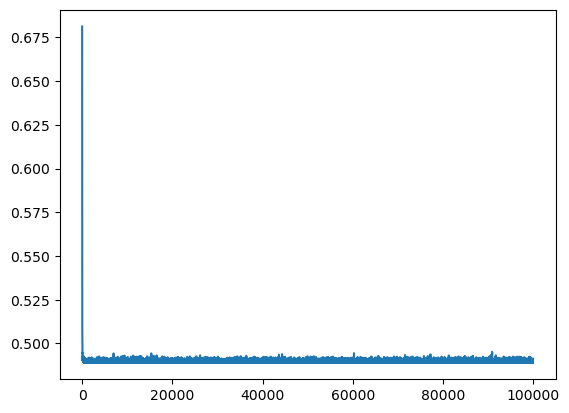

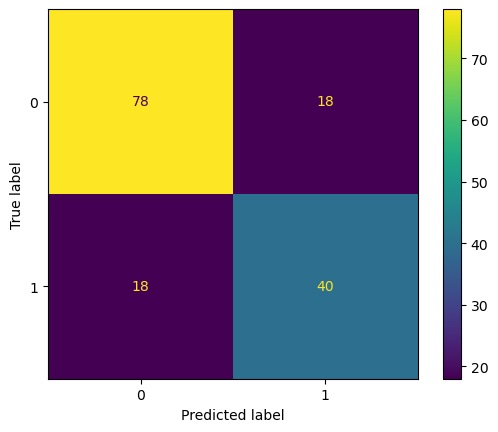

In [137]:
print(X_train.shape)
print(new_X_train.shape)
print(y_train.shape)
print(new_y_train.shape)



losses = logistic.fit(new_X_train, new_y_train)
y_pred = logistic.predict(X_test)

plt.plot(losses)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

print(classification_report(y_test, y_pred))